In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

지역적 선형 임베딩(LLE, Locally Linear Embedding)  
각 데이터 포인트의 이웃 데이터 중 k개 이웃 데이터를 선정하고 데이터 자신과 k개의 이웃 데이터를 하나의 덩어리로 가정하고 데이터를 재구성한다. 기존 데이터 자신의 이웃 데이터를 기준으로 재구성하는 방법으로 해당 데이터 자체보다 주변의 이웃 데이터들이 중요하다.

LLE 알고리즘을 활용해 와인 종류를 분류하는 모델을 생성해본다.

In [3]:
# 데이터 불러오기
from sklearn import datasets # 와인 데이터를 사용하기 위해 import 한다.
raw_wine = datasets.load_wine() # 와인 데이터를 불러온다.

In [4]:
# 피쳐/타겟 데이터 지정
X = raw_wine.data # 와인 피쳐 데이터를 저장한다.
y = raw_wine.target # 와인 타겟 데이터를 저장한다.

In [5]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, X_te.shape)

(133, 13) (45, 13)


In [6]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해 import 한다.
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn) # 트레이닝 피쳐 데이터 X_tn을 표준화 한다.
X_te_std = std_scale.transform(X_te) # 테스트 피쳐 데이터 X_te를 표준화 한다.

In [8]:
# LLE를 통한 데이터 차원 축소
from sklearn.manifold import LocallyLinearEmbedding # LLE 알고리즘을 사용하기 위해 import 한다.
lle = LocallyLinearEmbedding(n_components=2) # LLE 객체를 만든다.
lle.fit(X_tn_std, y_tn) # 표준화된 피쳐 데이터 X_tn_std와 트레이닝 타겟 데이터 y_tn를 LLE 객체에 적합시킨다.
X_tn_lle = lle.transform(X_tn_std) # 적합된 LLE 모형을 바탕으로 표준화된 트레이닝 데이터의 차원을 축소한다.
X_te_lle = lle.transform(X_te_std) # 적합된 LLE 모형을 바탕으로 표준화된 테스트 데이터의 차원을 축소한다.

In [9]:
# 데이터 차원 축소 확인
# 차원 축소 이전 데이터의 차원을 확인하면, 오리지널 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을 확인할
# 수 있고 주성분 분석을 이용해 차원 축소한 데이터는 2차원 데이터 133개로 구성되어 있음을 확인할 수 있다.
print(X_tn_std.shape, X_tn_lle.shape)

(133, 13) (133, 2)


In [11]:
# LLE 임베딩 벡터 확인
print(lle.embedding_) # embedding_ 속성으로 LLE 모형의 임베딩 벡터를 확인할 수 있다.

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

In [12]:
# LLE 적용 후 차원 축소된 데이터를 데이터프레임 형태로 변환한다.
import pandas as pd # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.
lle_columns = ['lle_comp1', 'lle_comp2'] # 차원 축소된 데이터의 열 이름을 정한다.
X_tn_lle_df = pd.DataFrame(X_tn_lle, columns=lle_columns) # 차원 축소된 데이터를 데이터프레임으로 만든다.
X_tn_lle_df['target'] = y_tn # 차원 축소된 데이터로 만든 데이터프레임에 타겟 데이터를 결합한다.
X_tn_lle_df

,lle_comp1,lle_comp2,target
0,0.103667,0.037909,0
1,0.072231,0.007653,1
2,0.112879,0.059241,0
3,0.115604,0.062051,0
4,0.118543,0.067187,0
...,...,...,...
128,-0.122454,0.117555,2
129,-0.106749,0.077420,2
130,0.001496,-0.119325,1
131,-0.111976,0.091433,2


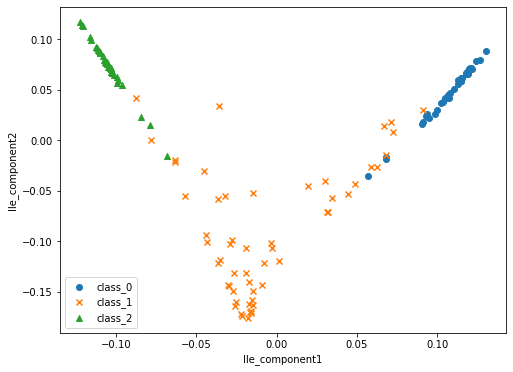

In [13]:
# LLE 적용 데이터 시각화
import matplotlib.pyplot as plt
df = X_tn_lle_df
markers = ['o', 'x', '^'] # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index] # 시각화할 와인 데이터를 얻어온다.
    target_index = raw_wine.target_names[index] # 시각화할 와인의 타겟 이름을 얻어온다.
    X1 = df_index['lle_comp1'] # 시각화할 차원 축소된 데이터의 첫 번째 주성분 벡터를 얻어온다.
    X2 = df_index['lle_comp2'] # 시각화할 차원 축소된 데이터의 두 번째 주성분 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index) # 산포도를 그린다.
# =====

plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()
plt.show()

In [14]:
# 데이터 학습 및 예측
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.
clf_rf_lle = RandomForestClassifier(max_depth=2, random_state=0) # 랜덤 포레스트 모델 객체를 만든다.
# 표준화된 피쳐 데이터 X_tn_std와 트레이닝 타겟 데이터 y_tn을 넣어서 랜덤 포레스트 알고리즘을 학습시킨다.
clf_rf_lle.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf_lle.predict(X_te_lle) # 표준화된 테스트 데이터 X_te_std로 예측한다.
print(pred_rf_lle)

[2 1 1 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 1 0]


In [15]:
# 정확도 평가
from sklearn.metrics import accuracy_score # 모형 정확도를 평가하기 위해 import 한다.
# accuracy_score() 함수의 인수로 실제 타겟 데이터와 예측된 데이터를 넘겨 정확도를 평가한다.
accuracy = accuracy_score(y_te, pred_rf_lle)
print(accuracy)

0.9333333333333333
